<a href="https://colab.research.google.com/github/shehadeh7/APS360-Project/blob/main/NSL_Mean_Models/model_using_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!unzip raw_processed_data.zip
# !unzip crema_raw_data.zip

Archive:  raw_processed_data.zip
  inflating: x_data.npy              
  inflating: y_data.npy              


In [5]:
# load X and Y from npy files
x_path = './x_data.npy'
y_path = './y_data.npy'
X = np.load(x_path)
Y = np.load(y_path)

In [6]:
print(X.shape)
print(Y.shape)

(11317, 180)
(11317,)


In [7]:
# shuffle X and Y same way
# random_state to seed the shuffle
from sklearn.model_selection import train_test_split

X_train_0, X_test, y_train_0, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.25, random_state=5) # 0.25 x 0.8 = 0.2

In [8]:
from sklearn import svm
from sklearn import preprocessing

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

sc = preprocessing.StandardScaler().fit(X_val)
X_val_scaled = sc.transform(X_val)

In [11]:
# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

adam = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile, train, and evaluate.
model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(X_scaled, y_train, batch_size=64, epochs=100, validation_data=(X_val_scaled, y_val))
# model.evaluate(x_test, y_test)

Epoch 1/100
107/107 [==============================] - 2s 7ms/step - loss: 2.0993 - accuracy: 0.1729 - val_loss: 1.7398 - val_accuracy: 0.2173
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 1.9116 - accuracy: 0.2102 - val_loss: 1.7065 - val_accuracy: 0.2345
Epoch 3/100
107/107 [==============================] - 1s 5ms/step - loss: 1.8414 - accuracy: 0.2419 - val_loss: 1.6640 - val_accuracy: 0.2822
Epoch 4/100
107/107 [==============================] - 1s 5ms/step - loss: 1.7706 - accuracy: 0.2670 - val_loss: 1.6288 - val_accuracy: 0.3158
Epoch 5/100
107/107 [==============================] - 1s 5ms/step - loss: 1.7187 - accuracy: 0.2828 - val_loss: 1.6011 - val_accuracy: 0.3450
Epoch 6/100
107/107 [==============================] - 1s 5ms/step - loss: 1.6691 - accuracy: 0.3030 - val_loss: 1.5734 - val_accuracy: 0.3763
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 1.6380 - accuracy: 0.3123 - val_loss: 1.5464 - val_accuracy: 0.3971

In [ ]:
# Create a base model -- sequential, functional, or subclass.
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

modelx = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

adam = tf.keras.optimizers.Adam()

# Compile, train, and evaluate.
modelx.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
modelx.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val))
# model.evaluate(x_test, y_test)

In [12]:
!pip install neural-structured-learning

In [13]:
import neural_structured_learning as nsl

tf.keras.backend.clear_session()

a_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

b_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

# # Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(b_model, adv_config=adv_config)

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile, train, and evaluate.
adv_model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=rms, 
                metrics=['accuracy'])

batch_size = 32

X_train_tensor = tf.convert_to_tensor(X_scaled, dtype=tf.float64)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float64)
X_val_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.float64)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float64)

train_data = tf.data.Dataset.from_tensor_slices(
    {'input': X_train_tensor, 'label': y_train_tensor}).batch(batch_size)
val_data = tf.data.Dataset.from_tensor_slices(
    {'input': X_val_tensor, 'label': y_val_tensor}).batch(batch_size)
val_steps = X_val.shape[0] / batch_size

history = adv_model.fit(train_data, batch_size=batch_size, epochs=100, validation_data=val_data)
#model.evaluate(X_test, y_test)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


  1/213 [..............................] - ETA: 1:40:36 - loss: 2.7795 - sparse_categorical_crossentropy: 2.3695 - sparse_categorical_accuracy: 0.0625 - scaled_adversarial_loss: 0.4099WARNING: AutoGraph could not transform <function wrap at 0x7fe4533abd40> and will run it as-is.
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
213/213 [==============================] - 48s 93ms/step - loss: 2.6020 - sparse_categorical_crossentropy: 2.1695 - sparse_categorical_accuracy: 0.1760 - scaled_adversarial_loss: 0.4325 - val_loss: 2.1241 - val_sparse_categorical_crossentropy: 1.7620 - val_sparse_categorical_accuracy: 0.2367 - val_scaled_adversarial_loss: 0.3621
Epoch 2/100
213/213 [==============================] - 2s 7ms/step - loss: 2.2874 - sparse_categorical_crossentropy: 1.9071 - sparse_categorical_accuracy: 0.2299 - scaled_adversarial_loss: 0.3803 - val_loss: 1.9915 - val_sparse_categorical_crossentr

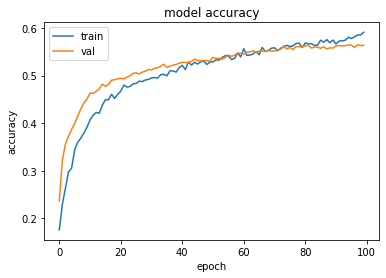

In [15]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

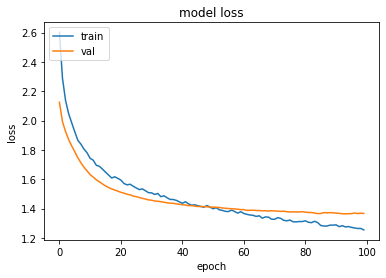

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
# Flatten X to a 2d array for random forest
clf.fit(X_scaled, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred=clf.predict(X_val_scaled)

In [ ]:
ascore = sklearn.metrics.accuracy_score(y_val, y_pred)

In [ ]:
print(ascore)

0.4787985865724382


In [ ]:
# Create a base model -- sequential, functional, or subclass.
model_rnn = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile, train, and evaluate.
model_rnn.compile(optimizer=rms,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model_rnn.fit(X_scaled, y_train, batch_size=64, epochs=200, validation_data=(X_val_scaled, y_val))
# model.evaluate(x_test, y_test)

Epoch 1/200
107/107 [==============================] - 23s 95ms/step - loss: 1.6632 - accuracy: 0.2657 - val_loss: 1.6341 - val_accuracy: 0.2703
Epoch 2/200
107/107 [==============================] - 9s 86ms/step - loss: 1.6242 - accuracy: 0.2868 - val_loss: 1.6089 - val_accuracy: 0.2951
Epoch 3/200
107/107 [==============================] - 10s 89ms/step - loss: 1.6019 - accuracy: 0.2922 - val_loss: 1.7729 - val_accuracy: 0.2314
Epoch 4/200
107/107 [==============================] - 9s 87ms/step - loss: 1.5845 - accuracy: 0.3065 - val_loss: 1.6129 - val_accuracy: 0.2959
Epoch 5/200
107/107 [==============================] - 9s 86ms/step - loss: 1.5700 - accuracy: 0.3190 - val_loss: 1.6069 - val_accuracy: 0.2867
Epoch 6/200
107/107 [==============================] - 9s 87ms/step - loss: 1.5582 - accuracy: 0.3257 - val_loss: 1.5763 - val_accuracy: 0.3405
Epoch 7/200
107/107 [==============================] - 9s 87ms/step - loss: 1.5532 - accuracy: 0.3392 - val_loss: 1.7685 - val_accurac

KeyboardInterrupt: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
modl=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
modl.fit(X_scaled,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_pr = modl.predict(X_val_scaled)

In [ ]:
accuracy=accuracy_score(y_true=y_val, y_pred=y_pr)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 56.89%
